<a href="https://colab.research.google.com/github/coder20pikachu/Customer_Churn_Analysis/blob/main/230007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records (2).csv


In [ ]:
df = pd.read_csv('Customer-Churn-Records.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5991,5992,15723737,Pitcher,680,France,Male,27,3,0.00,1,1,0,32454.26,0,0,3,DIAMOND,875
8745,8746,15793424,Tan,663,Spain,Female,28,8,61274.70,2,1,0,136054.45,0,0,4,PLATINUM,244
8318,8319,15765402,H?,520,France,Female,39,6,145644.05,1,0,0,104118.93,0,0,3,PLATINUM,467
9269,9270,15705383,Shen,642,France,Male,35,4,125476.31,1,1,1,91775.51,0,0,4,PLATINUM,467
9517,9518,15738042,Goliwe,543,Germany,Male,37,8,140894.06,2,1,1,118059.19,0,0,1,GOLD,623


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
print('Minimun Age:',df['Age'].min())
print('Maximum Age:',df['Age'].max())
print('Median Age:',df['Age'].median())

Minimun Age: 18
Maximum Age: 92
Median Age: 37.0


In [ ]:
#Number of custumer by Geography and Age
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['18-20', '20-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
No_of_customers_geo_age = df.groupby(['Geography', 'Age Group']).size().reset_index(name='Number of Customers')
No_of_customers_geo_age_sorted = No_of_customers_geo_age.sort_values(by='Number of Customers', ascending=False)
print(No_of_customers_geo_age_sorted)


   Geography Age Group  Number of Customers
2     France     31-40                 2311
14     Spain     31-40                 1118
3     France     41-50                 1067
8    Germany     31-40                 1022
1     France     20-30                  995
9    Germany     41-50                  678
15     Spain     41-50                  575
13     Spain     20-30                  451
7    Germany     20-30                  433
4     France     51-60                  367
10   Germany     51-60                  243
16     Spain     51-60                  187
5     France       61+                  161
17     Spain       61+                   90
11   Germany       61+                   80
0     France     18-20                   43
12     Spain     18-20                   26
6    Germany     18-20                   20


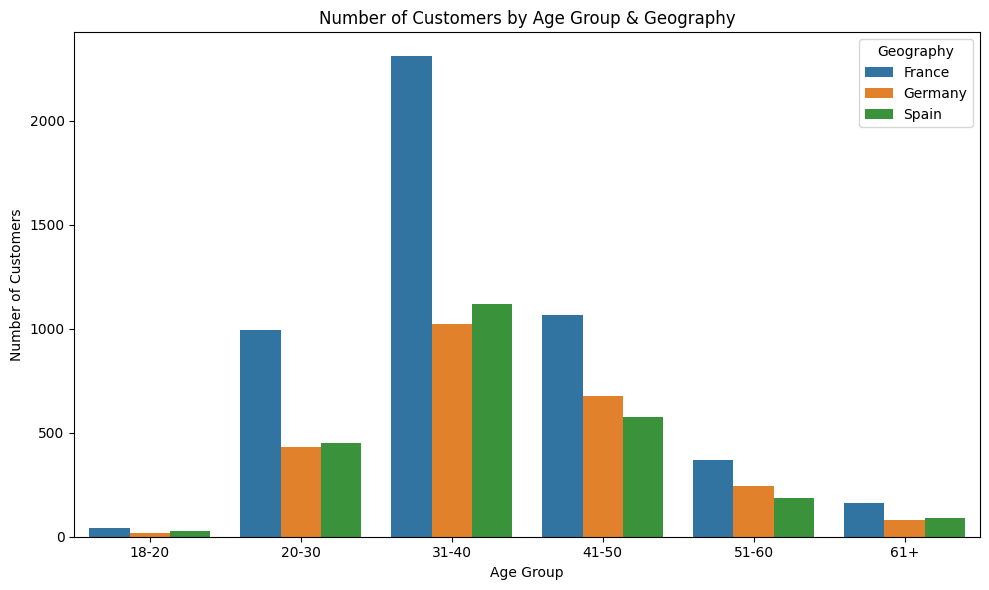

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_geo_age,x='Age Group', y='Number of Customers', hue='Geography',)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Geography')

plt.tight_layout()
plt.show()

In [ ]:
print('Minimum Salary:', df.EstimatedSalary.min())
print('Maximum Salary:', df.EstimatedSalary.max())
print('Median Salary:', df.EstimatedSalary.median())

Minimum Salary: 11.58
Maximum Salary: 199992.48
Median Salary: 100193.915


In [ ]:
#Number of customers by Salary Group and Exit Status
salary_bins = [0,1000,10000,25000,50000,75000,100000,200000]

sal_labels = ['0-1K','1K-10K','10K-25K','25K-50K','50K-75K','75K-100K','100K+']
df['Salary Group'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=sal_labels)
No_of_customers_Sal_Exited = df.groupby(['Salary Group', 'Exited']).size().reset_index(name='Number of Customers')
No_of_customers_Sal_Exited_sorted = No_of_customers_Sal_Exited.sort_values(by='Number of Customers', ascending=False)

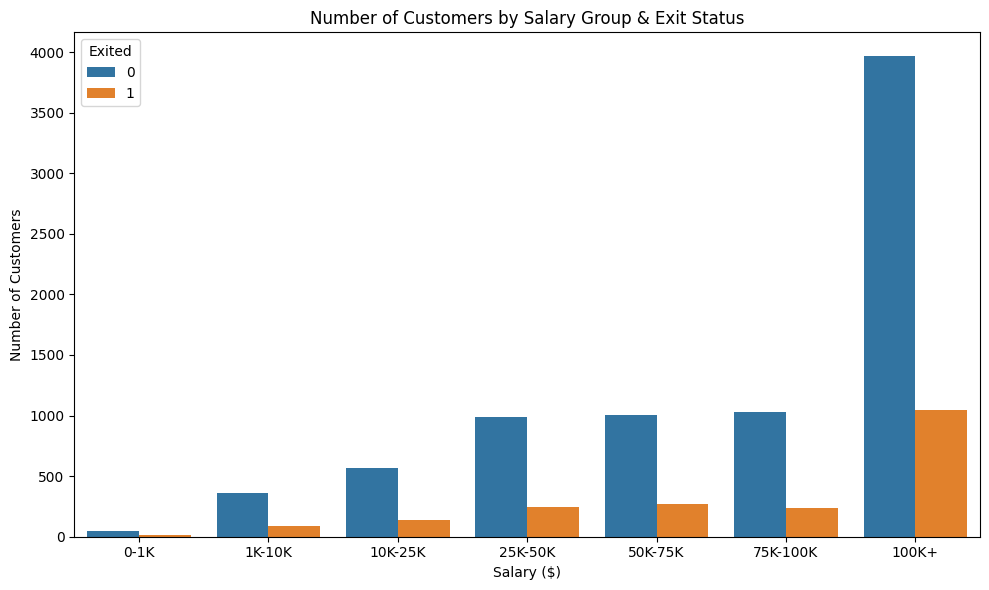

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_Sal_Exited_sorted ,x='Salary Group', y='Number of Customers', hue='Exited',)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Salary Group & Exit Status')

plt.tight_layout()
plt.show()

[]

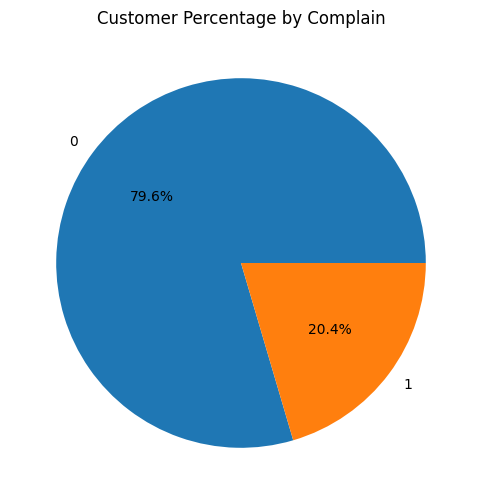

In [ ]:
#Customer Percentage by Complain:

cmplt_cust = df.groupby(['Complain']).size()
plt.figure(figsize= (8,6))
plt.pie(cmplt_cust, labels = cmplt_cust.index,autopct='%1.1f%%')
plt.title('Customer Percentage by Complain')
plt.plot()

<Axes: xlabel='Card Type', ylabel='Number of Customers'>

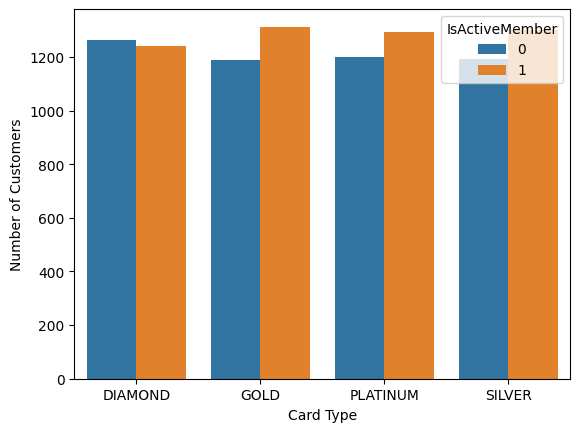

In [ ]:
#Customers Count by Card Type and IsActiveMember
customer_count_card_member = df.groupby(['Card Type', 'IsActiveMember']).size().reset_index(name='Number of Customers')
sns.barplot(data= customer_count_card_member, x= 'Card Type', y = 'Number of Customers', hue= 'IsActiveMember')

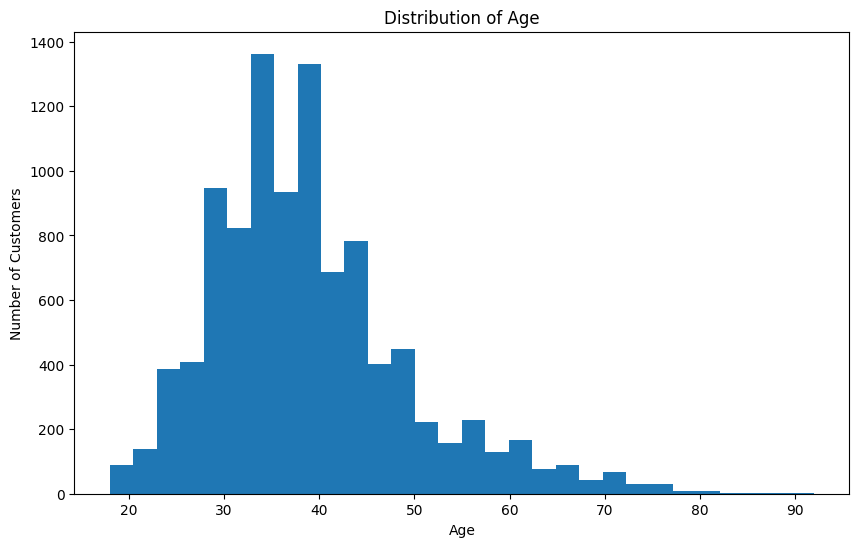

In [ ]:
#Distribution of Age,Gender,Cardtype
plt.figure(figsize =(10,6))
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

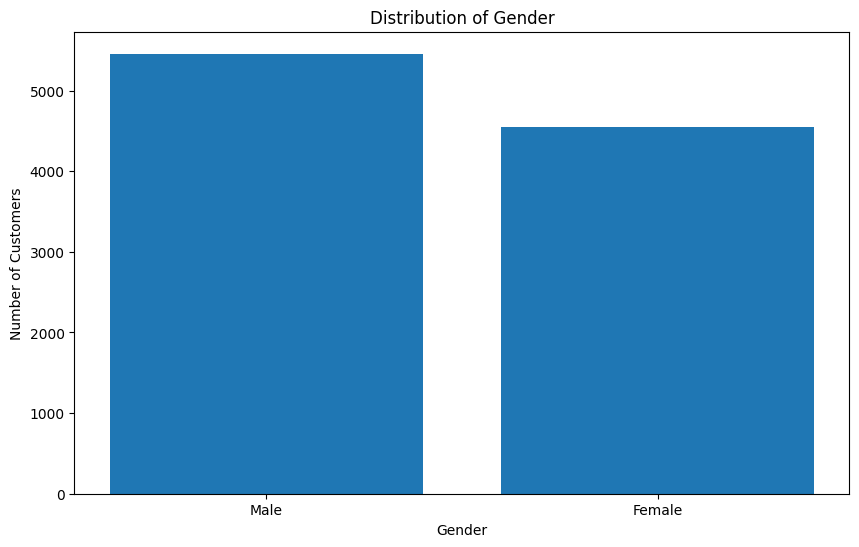

In [ ]:
plt.figure(figsize =(10,6))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Gender')
plt.show()

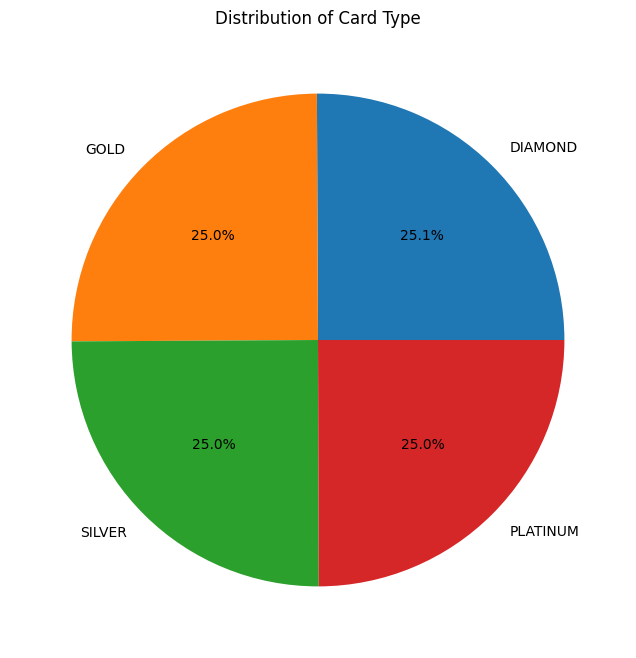

In [ ]:
plt.figure(figsize =(12,8))

card_type_counts = df['Card Type'].value_counts()
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Card Type')
plt.show()

In [ ]:
df[df['Gender']=='Female']['Age'].value_counts()

Age
35    209
39    208
40    205
37    200
38    200
     ... 
81      2
82      1
80      1
85      1
84      1
Name: count, Length: 67, dtype: int64

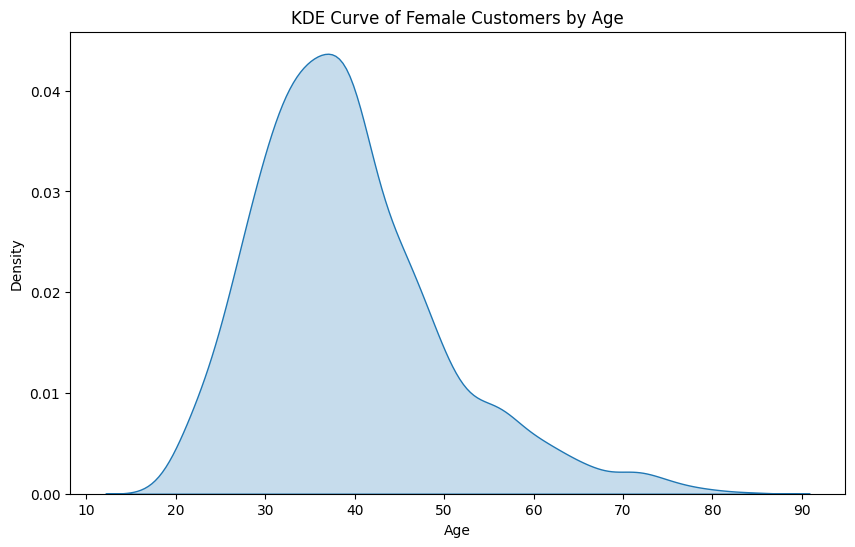

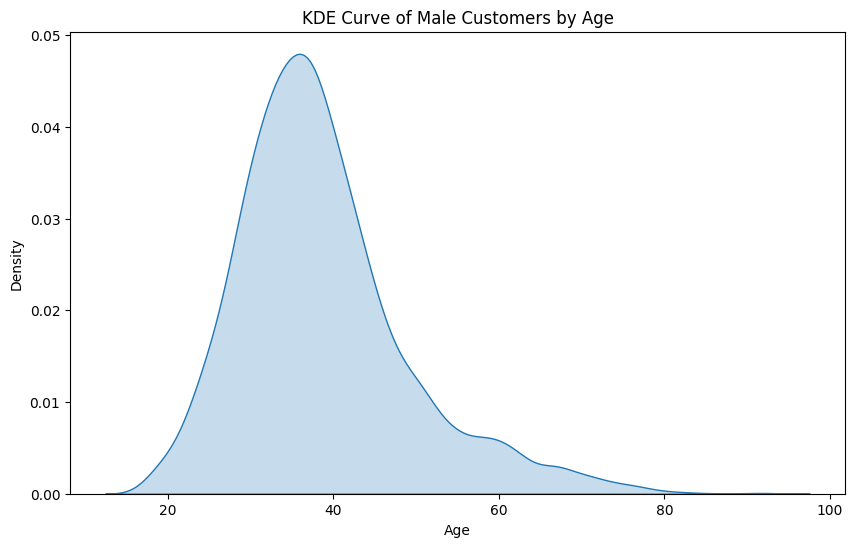

In [ ]:
#To plot KDE Curve of female & Male Customers by Age
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Female Customers by Age')
plt.show()
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Male Customers by Age')
plt.show()

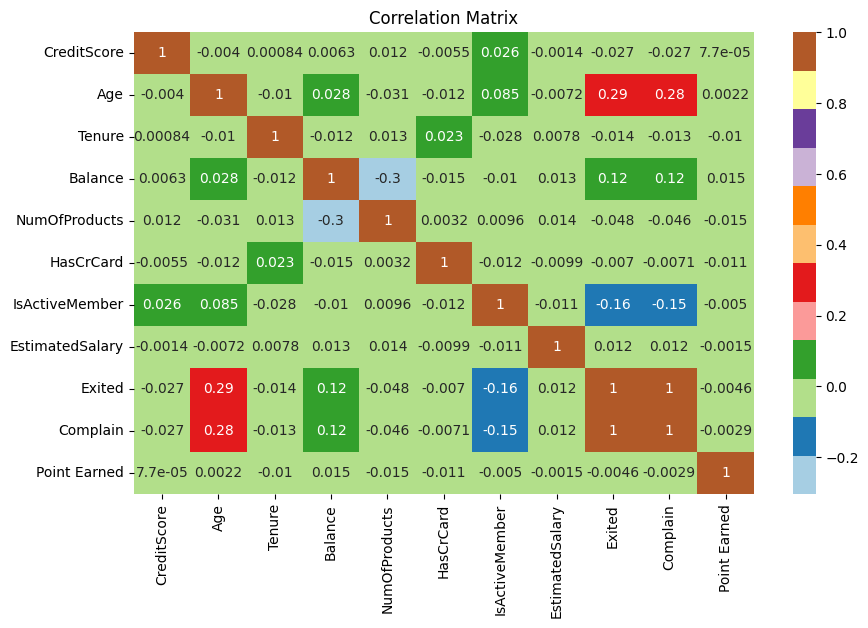

In [ ]:
# now Select only the numerical features for correlation matrix
numerical_features = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited','Complain','Point Earned']]
corr_matrix = numerical_features.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Paired')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#total churners
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

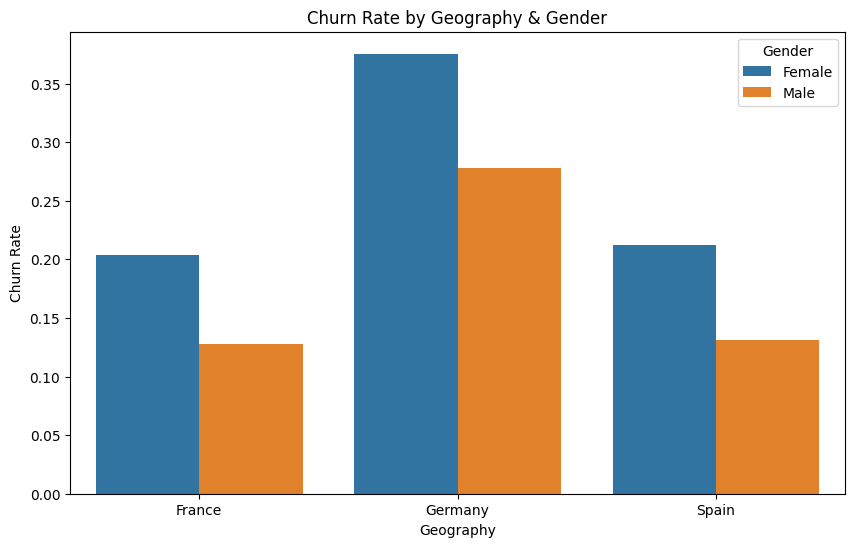

In [ ]:
#Churn Rate by Geography
plt.figure(figsize =(10,6))

churn_rate_geo_gender = df.groupby(['Geography','Gender'])['Exited'].mean().reset_index(name="Churn Rate")
sns.barplot(data=churn_rate_geo_gender, x= 'Geography', y= 'Churn Rate', hue='Gender')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography & Gender')
plt.show()

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Salary Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,100K+
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,100K+
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50,100K+
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31-40,75K-100K
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41-50,75K-100K


Text(0.5, 1.0, 'Churn Rate by Complain & IsActiveMember')

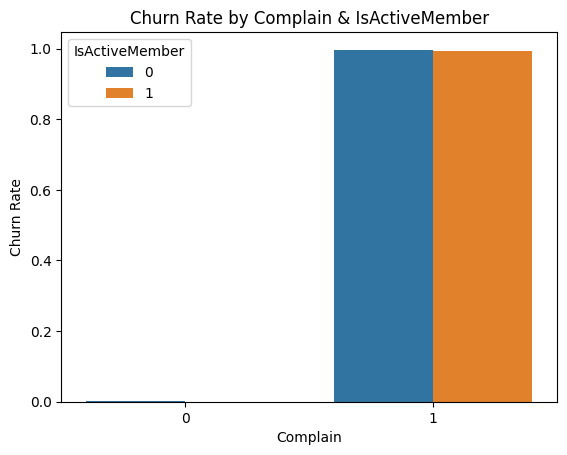

In [ ]:
#Churn Rate by Complain Status and Is Active Member or Not
churn_rate_complain = df.groupby(['Complain','IsActiveMember'])['Exited'].mean().reset_index()
sns.barplot(x='Complain', y='Exited', data=churn_rate_complain,hue='IsActiveMember')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complain & IsActiveMember')

In [ ]:
#Churn Rate by Age and Gender
import plotly.express as px
churn_rate_age_gender = df.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()
fig = px.scatter(data_frame=churn_rate_age_gender, x='Age', y='Exited', color='Gender',
                 title='Churn Rate by Age & Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Churn Rate')
fig.show()


In [ ]:
#Churn Rate by Tenure & HasCrCard
churn_rate_tenure_card = df.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')
print(churn_rate_tenure_card)

    Tenure  HasCrCard  Churn Rate
0        0          0    0.213793
1        0          1    0.238806
2        1          0    0.215569
3        1          1    0.228245
4        2          0    0.190323
5        2          1    0.192412
6        3          0    0.197133
7        3          1    0.216438
8        4          0    0.221429
9        4          1    0.198872
10       5          0    0.208333
11       5          1    0.205714
12       6          0    0.205128
13       6          1    0.201729
14       7          0    0.182119
15       7          1    0.168044
16       8          0    0.265018
17       8          1    0.164420
18       9          0    0.198630
19       9          1    0.225434
20      10          0    0.185185
21      10          1    0.214085


In [ ]:
fig = px.scatter(churn_rate_tenure_card, x='Tenure', y='Churn Rate', color='HasCrCard',
                 title='Churn Rate by Tenure & Has CreduCard')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Churn Rate')
fig.show()

In [ ]:
#Churn Rate by Geography and Tenure
churn_rate_tenure_card = df.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')
print(churn_rate_tenure_card)

    Tenure  HasCrCard  Churn Rate
0        0          0    0.213793
1        0          1    0.238806
2        1          0    0.215569
3        1          1    0.228245
4        2          0    0.190323
5        2          1    0.192412
6        3          0    0.197133
7        3          1    0.216438
8        4          0    0.221429
9        4          1    0.198872
10       5          0    0.208333
11       5          1    0.205714
12       6          0    0.205128
13       6          1    0.201729
14       7          0    0.182119
15       7          1    0.168044
16       8          0    0.265018
17       8          1    0.164420
18       9          0    0.198630
19       9          1    0.225434
20      10          0    0.185185
21      10          1    0.214085


In [ ]:
churn_rate_geo_tenure = df.groupby(['Geography', 'Tenure'])['Exited'].mean().reset_index()
fig = px.bar(churn_rate_geo_tenure, x='Geography', y='Exited', color='Tenure',
             title='Churn Rate by Geography & Tenure')
fig.update_layout(xaxis_title='Geography', yaxis_title='Churn Rate')
fig.show()


In [ ]:
#Churn Rate by Credit Score and NumOfProducts
churn_rate_credit_products = df.groupby(['CreditScore', 'NumOfProducts'])['Exited'].mean().reset_index()
fig = px.density_heatmap(churn_rate_credit_products, x='CreditScore', y='NumOfProducts',
                         z='Exited', title='Churn Rate by Credit Score & No. Of Products')
fig.update_layout(xaxis_title='Credit Score', yaxis_title='Number Of Products')
fig.show()

Building ML Predictive Model

In [ ]:
df  = df.drop(['Age Group','Salary Group'], axis =1)
df.fillna(method='ffill', inplace=True)
# Convert Categorical Columns to 'category' data type
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Card Type'] = df['Card Type'].astype('category')

# Encode Categorical Variables
encoded_data = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)
# Feature Selection
selected_features = encoded_data.drop(['Exited'], axis=1)
target_variable = encoded_data['Exited']

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=200)

# Train and Evaluate Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Calculate accuracy,Precision,Recall,F1-score
rf_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

print("Accuracy score:",rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy score: 0.9985
Precision: 0.9953271028037384
Recall: 0.9976580796252927
F1-score: 0.9964912280701754


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Model Evaluation

grid_search_predictions = grid_search.predict(X_test)
grid_search_accuracy = accuracy_score(y_test, grid_search_predictions)
grid_search_F1_Score = f1_score(y_test, grid_search_predictions)

print("Grid Search Accuracy:",grid_search_accuracy)
print("Grid Search F1-Score",grid_search_F1_Score)


Grid Search Accuracy: 0.9985
Grid Search F1-Score 0.9964912280701754
